#The dataset 🏀

The dataset contains statistics of **4000** NBA players, including:

- `season`: The season (yearly) the player played in
- `poss`: Possessions played
- `mp`: Minutes played
- `do_ratio`: A player’s ratio of time spent in defense vs. offense; negative values mean more defense positioning
- `pacing`: Player impact on team possessions per 48 minutes
- `win_rating`: Wins Above Replacement rating, how many additional wins a player is worth over a same-level replacement

# Predicting Win Ratings in the NBA

You're finally ready to try out **your first ML model**! 🔥


Your first regression task of this week is to **predict** the Win Rating of NBA players based on their characteristics.


Why is this a regression task?



Because the Win rating is a continuous feature, as it's on a scale!

In [1]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 44.0 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 58.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 55.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 29.4 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LinearRegression

## Import the data

The dataset is available at this link: [https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/NBA.csv](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/NBA.csv).

Load it into a `df`variable.

In [4]:
nba_df = pd.read_csv('NBA.csv')

In [5]:
nba_df.head()

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


In [6]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      4000 non-null   int64  
 1   poss        4000 non-null   int64  
 2   mp          4000 non-null   int64  
 3   do_ratio    4000 non-null   float64
 4   pacing      4000 non-null   float64
 5   win_rating  4000 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 187.6 KB


Do you see the **features and target**?

Yes, i see : 'poss', 'mp', 'do_ratio' & 'pacing' to determinate 'win_rating'

## Simple modelling


### Define X and y


We first need to define our features (X) and our target (y).


Let's start off with a simple example - let `X` be **the number of minutes** a player has played.

You can figure out what `y` should be from the task we are trying to achieve!


In [7]:
# Features (independent variables) 2D array
# Caractéristiques (X) : tableau 2D
X = nba_df[['mp']]

# Target (dependent variable) 1D arrat
# Cible (y) : tableau 1D
y = nba_df['win_rating']

In [8]:
print('y table', y.head())

print('X table', X.head())

y table 0     1.643091
1    10.808427
2     3.054773
3     0.230004
4     0.905614
Name: win_rating, dtype: float64
X table      mp
0  2409
1  2708
2  2407
3   585
4  2056


### Train test split


Another critical step Machine Learning is the **train, test, split**. \
This is especially important to avoid [data leakage](https://datascientest.com/en/data-leakage-definition-and-prevention).

Use Sklearn `train_test_split`function to create **4 variables** `X_train`, `X_test`, `y_train`, `y_test`. \
Have a look at the lecture if you are unsure about the syntax.




- Use `random_state=0` to compare your final results with your buddy's results.




In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3200, 1), (800, 1), (3200,), (800,))

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3200 entries, 1161 to 2732
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   mp      3200 non-null   int64
dtypes: int64(1)
memory usage: 50.0 KB


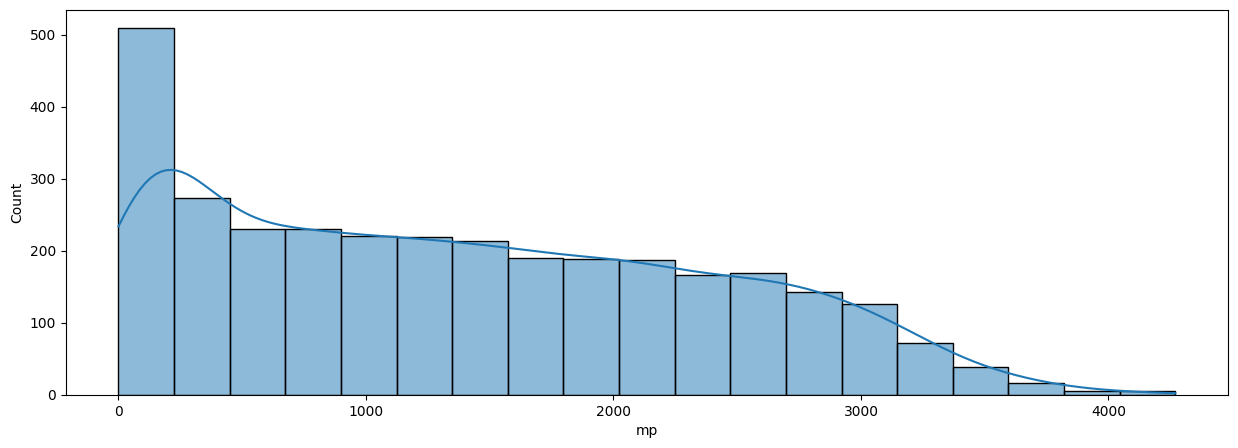

In [12]:
plt.figure(figsize=(15,5))
sns.histplot(X_train['mp'], kde=True)
plt.show()

### Scaling the features



We need to scale our numerical feature.

Import and instantiate a scaler of your choice from the **Sklearn** library. Then :

1. Fit and transform `X_train` and load the results in a `X_train_scaled`variable
2. Transform `X_test` and load the results in a `X_test_scaled` variable


⚠️  **IMPORTANT!  NEVER** fit the test dataset.


In [13]:
from sklearn.preprocessing import StandardScaler, RobustScaler

#Initialize scaler
scaler = StandardScaler()

In [14]:
#Fit & Transform data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modelling


Here come the exciting part!


**Linear Regression** is the fundamental regression model in Machine Learning!

For now, you don't need to understand the specifics of how it works, just know that it can do regression tasks very easily!

Import, instantiate and fit a **LinearRegression** model on the training data!

In [15]:
# Instancier le modèle de régression linéaire
lin_reg = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
lin_reg.fit(X_train, y_train)

LinearRegression()

### Scoring

Let's evaluate the performance of our model. \
Score your fitted model on your **test dataset** and store the result in a variable named `single_score`.



You should obtain a score around 54%.


In [16]:
# Évaluer le modèle sur l'ensemble de test
single_score = lin_reg.score(X_test, y_test)

# Afficher le score
print(f"Score du modèle sur l'ensemble de test : {single_score}")

Score du modèle sur l'ensemble de test : 0.5509456884683099


How can we interpret the score?

For now, bigger is better (the scale goes up to 1). We'll understand more in depth how to make sense of this when we study Linear Regressions in detail.


## A more complete features set

It's time to try the **Linear Regression** on all of the relevant features.

Create new `X` and `y` variables, using `poss`,`mp`,`do_ratio`and `pacing`as features this time.


In [17]:
X_new = nba_df[['poss','mp','do_ratio','pacing']]

y_new = nba_df['win_rating']

### Train test split


Split `X` and `y` as you did before. \
Remember to set `random_state=0` to compare your results with your buddy's.


In [18]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)

In [19]:
X_new_train.shape, X_new_test.shape, y_new_train.shape, y_new_test.shape

((3200, 4), (800, 4), (3200,), (800,))

In [20]:
X_new_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3200 entries, 1161 to 2732
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   poss      3200 non-null   int64  
 1   mp        3200 non-null   int64  
 2   do_ratio  3200 non-null   float64
 3   pacing    3200 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 125.0 KB


### Scaling

Now it's time to scale the data, just like we did before!

In [21]:
X_new_train_scaled = scaler.fit_transform(X_new_train)
X_new_test_scaled = scaler.transform(X_new_test)

### A new model

Because we have a new set of features, we need to train a new model!

Instantiate and train a second model on with your new features.


In [22]:
#Applies same transformations data on new data
X_new_scaled = scaler.transform(X_new)

Score your new fitted model, and store the results in a variable named `multiple_score`.


In [23]:
# Instancier le modèle de régression linéaire
new_model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
new_model.fit(X_new_train, y_new_train)


LinearRegression()

Compare `single_score`and `multiple_score`.

In [24]:
# Évaluer le modèle sur l'ensemble de test
single_score = lin_reg.score(X_test, y_test)
multiple_score = new_model.score(X_new_test, y_new_test)

In [25]:
# Afficher le score
print(f"Score du modèle sur l'ensemble de test : {single_score} et le test à plusieurs variables {multiple_score}")

Score du modèle sur l'ensemble de test : 0.5509456884683099 et le test à plusieurs variables 0.6446947826843756


> **We can observe a substantial increase of the score when we train a model on many features instead of just one.**


## A new player arrives!

These are his stats:

- poss: 4902
- mp: 1845
- do_ratio: 1.011
- pacing: 0.381

Create a single row DataFrame for this new player!

In [26]:
new_player = pd.DataFrame({'poss': 4902, 'mp': 1845, 'do_ratio': 1.011, 'pacing': 0.381}, index=[0])
new_player

,poss,mp,do_ratio,pacing
0,4902,1845,1.011,0.381


In [27]:
new_player_scaled = scaler.transform(new_player)

Predict the win rating for this new player!


In [28]:
new_model.predict(new_player)

array([3.34968325])

## What is going on?

That's an astronomical win rating! Did'nt we forget to do something?

We did... can you figure out what we forgot to do and fix the issue? \
Once you have, you can go on with the prediction!

In [29]:
#your code here

**Congratulations on training your first regression model!** 🎉

